In [2]:
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
n = 1000
k = 10

assert k%2==0 and k >= 2 and k<=n

In [4]:
def give_G(n=n,k=k):
  G = nx.generators.classic.cycle_graph(n)
  nodes = list(G.nodes)
  nearest_nodes_max_distance = k/2 

  for k_i in range(2, int(nearest_nodes_max_distance+1)):
    for x in nodes:
      G.add_edge(nodes[x-k_i],x)
  return G
  
G = give_G()

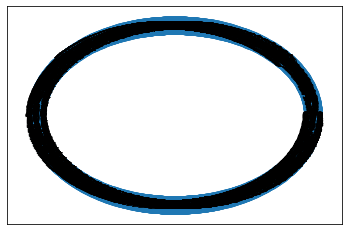

In [5]:
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos=pos)

In [6]:
def random_graph(p, n=n,k=k):
  G = give_G(n,k)
  nodes = list(G.nodes)
  nearest_nodes_max_distance = k/2 
  for k_i in range(1, int(nearest_nodes_max_distance+1)):
    for x in nodes:
      if np.random.rand() < p:
        new_target = np.random.choice(nodes)
        if not G.has_edge(x,new_target) and new_target!=x:
          G.add_edge(x,new_target)
          G.remove_edge(x, nodes[x-k_i])
  return G

In [22]:
geo_points = np.geomspace(0.00023,1,num=12)
dict_data = {x:{"L":[],"C":[]} for x in geo_points}

G_0 = give_G()
C_0 = nx.average_clustering(G_0)
L_0 = nx.average_shortest_path_length(G_0)

for x in tqdm(range(10)):
  for p in geo_points:
    G_p = random_graph(p)
    C_p = nx.average_clustering(G_p)
    L_p = nx.average_shortest_path_length(G_p)
    dict_data[p]["C"].append(C_p)
    dict_data[p]["L"].append(L_p)


100%|██████████| 10/10 [03:59<00:00, 23.95s/it]


In [23]:
L_list = [np.median(data["L"])/L_0 for data in dict_data.values()]
C_list = [np.median(data["C"])/C_0 for data in dict_data.values()]

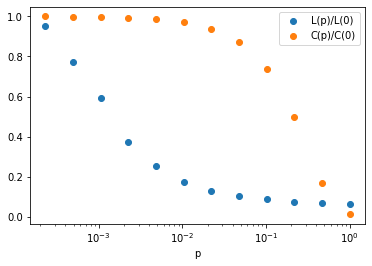

In [24]:
plt.scatter(geo_points,L_list, label='L(p)/L(0)')
plt.scatter(geo_points,C_list, label='C(p)/C(0)')
plt.xscale('log')
plt.xlabel('p')
plt.legend()
plt.show()